In [1]:
import numpy as np
import scipy.sparse as sps
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
genexp = np.load('/home/nanni/Projects/gexi-top/data/processed/d-gex/bgedv2_GTEx_1000G_float64.npy')
#gene_correlations = np.corrcoef(genexp)
#np.save('/home/varrone/gene-expression-chromatin/data/gene_correlations_full.npy', gene_correlations)
gene_correlations = np.load('/home/varrone/gene-expression-chromatin/data/gene_correlations_full.npy')

In [3]:
DIRECTORY_GRAPH = '/home/nanni/Projects/gexi-top/data/interim/graphs/'
A = sps.load_npz(str(DIRECTORY_GRAPH) + 'genemania.npz')

A.shape

(10463, 10463)

In [4]:
target_landmarks = A[943:, :943].todense()
target_landmarks.shape

(9520, 943)

In [5]:
np.count_nonzero(target_landmarks)

348030

In [6]:
idx_sorted = np.argsort(-target_landmarks, axis=1)
idx_sorted

matrix([[ 79, 140, 413, ..., 321, 309, 942],
        [347, 756, 417, ..., 325, 312, 942],
        [478, 213, 292, ..., 328, 330, 942],
        ...,
        [704, 493,  84, ..., 323, 325, 942],
        [513, 693,  10, ..., 322, 310, 942],
        [643, 450,  76, ..., 335, 309, 942]])

In [31]:
n_interactions = np.ravel((target_landmarks != 0).sum(axis=1))
n_interactions.shape

(9520,)

In [9]:
def get_interaction_mask_old(indices):
    n_interactions = np.ravel((indices != 0).sum(1))
    mask = np.zeros(shape=gene_correlations.shape, dtype=bool)
    for i, n_neighbors in enumerate(n_interactions):
        print(n_neighbors)
        neighbors_idx = indices[i, :n_neighbors]
        mask[943+i, neighbors_idx] = True
    return mask

SyntaxError: invalid syntax (<ipython-input-9-5812cc8144d0>, line 2)

In [25]:
def get_interaction_mask_old2(indices, target_landmarks):
    mask_high = np.zeros(shape=gene_correlations.shape, dtype=bool)
    mask_avg = np.zeros(shape=gene_correlations.shape, dtype=bool)
    mask_low = np.zeros(shape=gene_correlations.shape, dtype=bool)
    for i, neighbors in enumerate(indices):
        interactions = target_landmarks[i, neighbors]
        n_interactions = np.count_nonzero(interactions)
        neighbors_idx = neighbors[:n_interactions]
        
        high, avg, low = np.array_split(neighbors_idx, 3, axis=1)
        print(high, avg, low)
        mask_high[943+i, high] = True
        mask_avg[943+i, avg] = True
        mask_low[943+i, low] = True
    return mask_high, mask_avg, mask_low

In [35]:
def get_interaction_mask(idx_sorted, n_interactions):
    mask_high = np.zeros(shape=gene_correlations.shape, dtype=bool)
    mask_avg = np.zeros(shape=gene_correlations.shape, dtype=bool)
    mask_low = np.zeros(shape=gene_correlations.shape, dtype=bool)
    for i, n_neighbors in enumerate(n_interactions):
        idx_connected = idx_sorted[i, :n_neighbors]
        
        high, avg, low = np.array_split(idx_connected, 3, axis=1)
        mask_high[943+i, high] = True
        mask_avg[943+i, avg] = True
        mask_low[943+i, low] = True
    return mask_high, mask_avg, mask_low

In [36]:
mask_high, mask_avg, mask_low = get_interaction_mask(idx_sorted, n_interactions)


In [16]:
'''average_mask = get_interaction_mask(average, target_landmarks)
print(np.count_nonzero(average_mask))
low_mask = get_interaction_mask(low, target_landmarks)'''

0


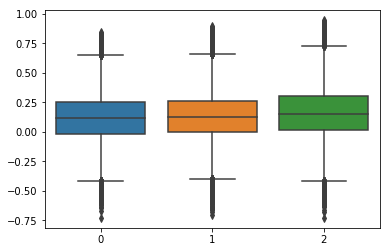

In [37]:
sns.boxplot(data=[gene_correlations[mask_low], gene_correlations[mask_avg], gene_correlations[mask_high]])